In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

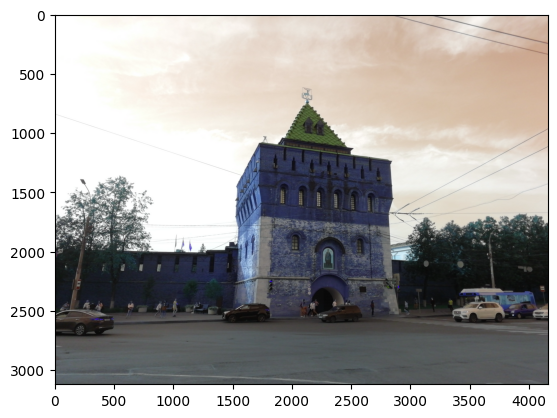

In [5]:
img = cv2.imread("example.jpg")
plt.imshow(img)

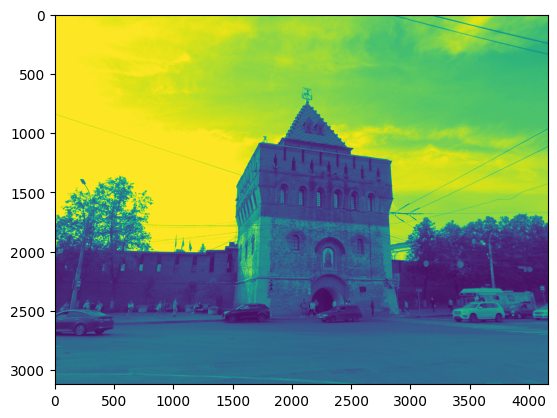

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y = cv2.cvtColor(cv2.merge([img[:, :, 0]]*3), cv2.COLOR_BGR2GRAY)
plt.imshow(y)

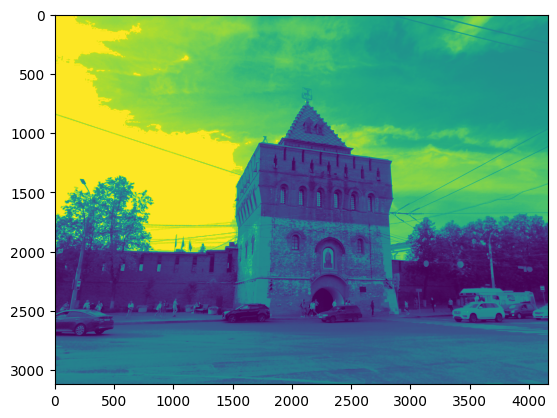

In [9]:
y_equalize = cv2.equalizeHist(y)
plt.imshow(y_equalize)

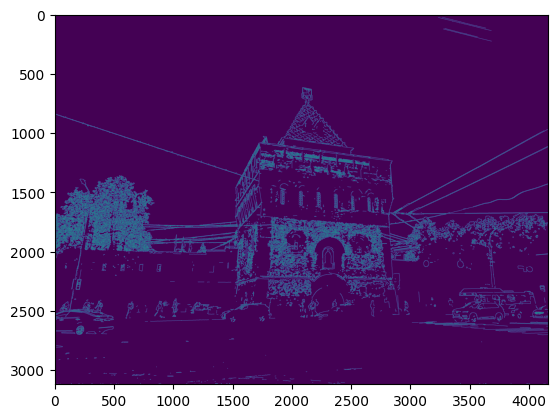

In [10]:
Canny = cv2.Canny(y_equalize, 100, 200)
plt.imshow(Canny)

In [11]:
dst = cv2.cornerHarris(Canny, 5, 3, 4e-3)
dst

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
dst_norm = np.empty(dst.shape, dtype=np.float32)
cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
thresh = int(np.quantile(dst_norm, 1 - 250/np.dot(*dst_norm.shape)))

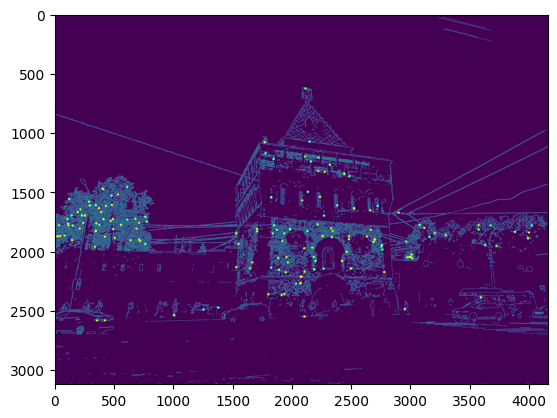

In [14]:
for i in range(dst_norm.shape[0]):
    for j in range(dst_norm.shape[1]):
        if int(dst_norm[i, j]) > thresh:
            cv2.circle(Canny, (j, i), 10, 255, -1)
plt.imshow(Canny)

In [ ]:
thresh = cv2.threshold(Canny, 20, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.dilate(thresh, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))